

Convergence
===========

<hr style="height:2.5px">


Massive amounts of care is involved with setting up simulations. We should also take great care in determining how much we can trust our simulations. This tutorial shows the user how to use the convergence submodule within `biceps` to determine if MCMC sampling has converged.  

<!--
Massive amounts of care is involved with setting up the simulations. Systems are getting larger and more complex as time progresses and we need to fully understand how much we can trust our simulations.  Therefore, it is essential that we take great care of our statistical uncertainties. Convergence validation is thus becoming important for accurate results. Unfortunately, this is quite troublesome because we usually are unaware of the "true value". Besides the "true value" (e.g conformational state population) that we are most interested in, there are multiple hyper-parameters in BICePs we need to carefully judge before we can trust the outcome results: number of states, number of $\lambda$ values, the range of nuisance parameters ($\sigma$, $\gamma$, etc), the number of steps of MCMC sampling, the choice of reference potentials (see \nameref{sec:Theory}), etc.  The number of conformational states is determined during the construction of models and beyond the scope of this paper. Now we want to discuss our strategy in determining the range of nuisance parameters and the number of steps of MCMC sampling.

In general, the broader the range of nuisance parameters to sample the more accurate the results will be since more potential nuisance parameters are included in the sampling. However, this also may cause several unexpected problems. First more parameters to sample increases the barrier of convergence. In other words, to ensure all parameters are sampled at least once, more steps are necessary for MCMC sampling. It is important to make clear that MCMC sampling is not required to sample all possible values in nuisance parameter space (e.g $\sigma$, $\gamma$). But if one demands to sample all parameters at least once then a larger number of steps to run is required for broader range of parameters. This decreases the efficiency of BICePs and requires more computational resource. So it is important to determine a proper range of nuisance parameters that is enough for accurate calculation and also efficient enough.

One metric that can be useful for judging this could be checking if all states are sampled at least once with the available nuisance parameters. Although we mentioned it is not required to sample all nuisance parameters, it is necessary to sample all states at least once. Because we will use MBAR algorithm to estimate the conformational state populations and the states without sampling will be considered as infinite high potential energy and the predicted population will be infinite small correspondingly. Thus, checking if all states are sampled at least once can ensure it is reasonable to conduct further analysis and also provides an opportunity to assess the range of nuisance parameters defined.

Another metric is the acceptance ratio in MCMC sampling. A low acceptance ratio indicates an improper settings of parameters used since a huge amount of time is wasted in MCMC sampling. This is similar to the strategy used in replica-exchange molecular dynamic (REMD) simulations where one can assess the temperatures range and stride using acceptance ratio when an attempt of swapping between temperatures happened. To better assess the effect of different parameters (state space and nuisance parameters space), we provide both overall acceptance ratio and detailed acceptance ratio associated with each parameter sampled (see Table S1). This should be helpful in improving the acceptance ratio by specifically tweaking parameter range.

To show how this strategy works, we did a test using previously published data \cite{Voelz:2014fga} with atomic distances restraint only. In our test, two nuisance parameters are tweaked: $\sigma_{noe}$ and $\gamma$. As we discussed earlier, $\sigma_{noe}$ represents uncertainty in the experimental measurements and the scaling factor $\gamma$ represents the uncertainty in converting atomic distances to NOE signal strength. Different amount of available $\sigma_{noe}$ and $\gamma$ are tested where the minimum and maximum values are fixed and different strides are used. This returns the 603 available $\sigma_{noe}$ and 324 available $\gamma$ values as maximum and 4 and 2 available values for $\sigma_{noe}$ and $\gamma$ as minimum. For each set of avaible paramters, we performed MCMC sampling with different amount of steps (10K, 100K, 1M, 10M, 100M) and two $\lambda$ values ($\lambda = 0.0, 1.0$) are used. The results show several important features of BICePs 2.0. First, the sampling with $\lambda=0.0$ could cover all states whereas $\lambda=1.0$ always failed to do so (See Figure \ref{fig:fractions}, more $\lambda$ values are included). This observation matches our expectation because when $\lambda=1.0$, full information of conformational states from computational simulation is used in the sampling. Some states are not favored in the simulation (e.g high potential energy) and even if the structural observable agrees well with the experimental data, this prior information from simulation will penalize such states in the energy calculation (see Eq \ref{eq:neglogP}).

Previous work \cite{Voelz:2014fga} showed some conformational states may satisfy experimental restraints but have high potential energy where the states picked by BICePs agree well with experimental results and are favored in simulations. In the end, those populated states in BICePs prediction have good agreement with the crystal structures. When $\lambda=0.0$, there is no prior information from simulation used in the sampling. Instead, each conformational states are treated uniformly. In that case if the conformational state is favored in the sampling is entirely determined by the $\chi^2$ values (Eq \ref{eq:chi2}) and reference potentials. Thus those unfavored states in the simulations have a better chance to get sampled and accepted the MCMC move in the state space. This is further confirmed by checking the acceptance ratio. For each ensemble (settings are exactly same), the acceptance ratio when a movement is attempted in the state space is always larger when $\lambda=0$ than the sampling with $\lambda=1$. On average, it is xxx times higher in acceptance ratio with $\lambda=0$ than that with $\lambda=1$.
-->

<hr style="height:2.5px">

Typically, massive amounts of care is involved with setting up simulations. Thus, it is essential that we attempt to objectively uncover the validity of our simulations. Despite there being no single clear best practice to quantify MCMC sampling quality<a id="ref:best" href="#best">$^{1}$</a>, `biceps.Convergence` possess methods that suit our needs e.g., autocorrelation, block-averaging, bootstrapping, Jensen-Shannon divergence (JSD) and more. Previously in BICePs 1.0, trajectory convergence was measured by comparing populations and BICePs scores from sets of trajectories with varying number of steps differing by an order of magnitude. For converged results, the populations and biceps score should be similar regardless of the trajectory length.

We stress that users should check that their MCMC simulations satisfy the following items before checking convergence: 1) All states are sampled at least once over all $\lambda$ values.  The MBAR algorithm estimates conformational state populations and the states not sampled for any lambda value will be considered to have infinitely high potential energy and the corresponding predicted population will be infinite small. 2) The MCMC acceptance percentage of sample space is high. Low acceptance percentage is a sign of inefficient sampling and implies that many more steps are required to adequately sample parameter space.

<!--
We also find several calculations failed in sampling all states at least once during the simulations with 10K steps for both $\lambda$ values. But with 100K steps all BICePs sampling cover all conformational states even with only ensembles where 4 and 2 values are available for $\sigma_{noe}$ and $\gamma$, respectively. To exclude the stochastic effect in the sampling, we further performed 5 rounds calculation for each ensemble with 10K, 100K, 1M, 10M steps and the results are consistent with our previous observation from initial run. We should mention that there is no universal trend observed in those failed samplings. Even in the ensemble where only 6 available $\sigma_{noe}$ and 3 $\gamma$ values yielding totally $3*6*100=1800$ parameters to sample (100 conformational states), 10K steps is not enough for MCMC sampling cover all 100 conformational states. This unexpected results highlights the importance of performing such examination in the sampling before we move on to further analysis. Lastly, the previous work \cite{Voelz:2014fga} showed the most likely $\sigma_{noe}$ and $\gamma$ values which gives the best overlap between the theoretical modelings and the experimental data. Some ensembles in our test do not have those most likely $\sigma_{noe}$ and $\gamma$ values available or even close values. Although the sampling can cover all states when $\lambda=0$, the predicted population is still off the correct targets (i.e picked up some other states the most populated). However, the BICePs scores show a positive number which indicates such posterior distribution does not agree well with the experimental constraints. In our test, those ensembles with positive BICePs scores don't pick up correct conformational state as the most populated. This highlights the power of using BICePs score in judging the BICePs calculation.

Now we have some metrics to help us determine proper nuisance parameters range, here is another common question we may have: how many steps should be ran for converged results? It should be noted that this type of question requires a high level of statistical consideration. One conventional way could be checking if a different number of steps for sampling returns the same results of interest (e.g state population, BICePs score). This is also frequently used in our previous work. For example, we could run 1 million steps and 10 million steps of MCMC sampling to see if the predicted populations and computed BICePs scores are independent on the number of steps. In this work, we hope to develop a more statistical significant method to test the convergence of the sampling which is more quantitative and clear than what we did in the past.  In BICePs 2.0, we provide two different ways of assess the convergence: (1) block-averaging and (2) Jensen-Shannon divergence (JSD). Both methods require decorrelating the original sampled data first.
Given a time-series dataset $T(\theta)$ which could be sampled nuisance parameter $\sigma_j$ ($j$ is the index of available experimental observables) from BICePs calculation (see Figure \ref{fig:autocorr}(a)). Then we can compute the autocorrelation function:



In practice, we partition the resulted trajectory from BICePs sampling into 10 blocks and compute $JSD_{single}$ and distribution of $\Big\{JSD_{random}\Big\}_N$ (we suggest $N \geq$ 100) with cumulatively increasing data (10\%, 20\%,..,100\%). Figure \ref{fig:JSD_conv_unconv} shows an example of JSD curve of 100K steps BICePs sampling. The single points represent $JSD_{single}$ and the shaded part represent the distribution of $JSD_{random}$ (for 95\% confidence interval (CI), top and last 5\% are excluded). With only 10\% and 20\% data, apparently it is not converged since $JSD_{single}$ is out of the distribution of $JSD_{random}$. As more data  included ($\geq 30\%$), computed $JSD_{single}$ and $JSD_{random}$ become smaller and close to zero. A JSD value of zero indicates the two distribution $P_1$ and $P_2$ are almost identical to $P_{comb}$ which is a sign of convergence. However, with more than 80\% data included, $JSD_{single}$ is out of the $JSD_{random}$ distribution indicates overall this trajectory is not converged. It is tricky since with same set-up, 10K steps BICePs sampling achieves convergence when 100\% data is used (Figure \ref{fig:JSD_conv_unconv}b). However, the truth that 100K steps sampling doesn't achieve the convergence indicates that 10K steps only can achieve local convergence. With more steps (1M and 10M steps), we can see it is converged again (Figure \ref{fig:JSD_conv_unconv}d-e). This highlights the importance of performing multiple trials of BICePs sampling with different amount of steps in practice and distinguish local and global convergence as shown in Figure \ref{fig:JSD_conv_unconv}. We also find a general trend that $JSD_{single}$ values computed using all data approaches to zero when more steps of sampling was performed (Figure S1).


As we explained the methods offered in BICePs to check convergence of sampling, here we illustrate the proper way of using the convergence module within BICePs with actual scripts and corresponding outputs. Verifying the convergence of sampling has been made very straightforward for users.



Using the \mintinline{python}{Convergence} submodule only requires the input of a biceps MCMC trajectory. Upon initialization, the trajectory is automatically read into memory to obtain all the necessary information. Similar to the other code-blocks, the local variable \verb|C| contains all the functionality of the \mintinline{python}{Convergence} class. On line 25,  \mintinline{python}{C.get_autocorrelation_curves} method is invoked, such that equations \ref{eq:g} and \ref{eq:tau} are used to compute the autocorrelation function and autocorrelation time for the trajectory trace in figure \ref{fig:autocorr} A. The resultant curve is found in figure \ref{fig:autocorr} B.
By default, \mintinline{python}{method="auto"} defines the method to compute autocorrelation time (see Eq \ref{eq:tau}). The upper-bound i.e., the size of the window used in calculating the autocorrelation time is determined by setting \mintinline{python}{max_tau} (10000 in this example).

Other \mintinline{python}{method} options include \mintinline{python}{"block-avg"} and \mintinline{python}{"exp"}. When using \mintinline{python}{method="block-avg"}, similar operations are conducted but instead of using the whole trajectory data, 5 blocks (by default) are used to partition the trajectory. The averaged $\tau_{auto}$ and the standard deviation of all blocks will be returned. If other options of number of blocks are desired, one can easily set it by defining \mintinline{python}{nblocks}. For example,
\mintinline{python}{C.get_autocorrelation_curves} would require \mintinline{python}{method="block-avg"} and \mintinline{python}{nblocks=4} as input arguments  to compute $\tau_{auto}$ using a block averaging approach with 4 blocks.  For \mintinline{python}{method="exp"} (exponential fitting, Figure \ref{fig:autocorr} c.), $\tau_{auto}$ is directly related to the coefficents of the exponential curve fit using the entire trajectory as discussed earlier.

The autocorrelation time and other necessary information obtained from line 25 gets stored in the convergence object \mintinline{python}{C} and used with \mintinline{python}{C.process}.  All JSD analysis found in section {\ref{sec:jsd}JSD} is computed from \mintinline{python}{process}.  Automatically, BICePs will save the JSD curves and JSD distributions (Figure \ref{fig:JSD_dist_good}). If specified, a figure of partition a decorrelated dataset into $n$ blocks (\mintinline{python}{nblock}) and the averaged (most sampled) parameter for each block and the overall data will be plotted for visual examination (Figure \ref{fig:block_avg}).  In order to obtain the latter, the required arguments for the method \mintinline{python}{process} must be understood: \mintinline{python}{nblock} is the number of partitions in the time series, \mintinline{python}{nround} is the number of rounds of bootstrapping when computing JSDs, \mintinline{python}{nfold} is the number of partitions in the shuffled (subsampled) trajectory, and \mintinline{python}{block} is a boolean value that specifies whether Figure \ref{fig:block_avg} will be generated (\mintinline{python}{block=False} by default).
-->

In [1]:
import biceps

BICePs - Bayesian Inference of Conformational Populations, Version 2.0


After consideration of the latter items, the `biceps.Convergence` class should be used to give a statistical evaluation of convergence in MCMC trajectories. To get started, the class only requires the `filename` of a biceps MCMC trajectory (including its relative path) for initialization. In this step, the trajectory is read into memory and stored as the local variable convergence object `C`. 

In [2]:
%matplotlib inline
C = biceps.Convergence(filename='../MP_Lambdas/results/traj_lambda0.00.npz')

To view the trajectory of 1M steps, we plot the time-series of sampled nuisance parameters ($\sigma_{J}$, $\sigma_{NOE}$ and $\gamma$).

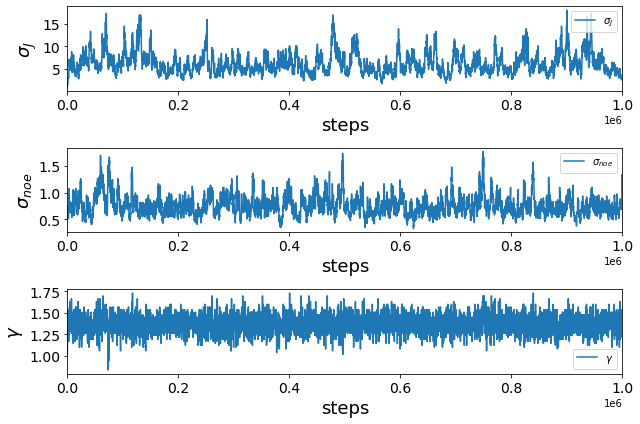

In [3]:
C.plot_traces(figname="traces.pdf", xlim=(0, 1e6))

<h1 style="align: center;font-size: 18pt;">Computing the autocorrelation</h1>

Next, we need to determine the trajectory length at which sampling becomes decorrelated. Autocorrelations curves and autocorrelation times are computed for each time-series of sampled nuisance parameters. The computed autocorrelation times for each nuisance parameter are stored in `C` to be used for further convergence analysis. By default, our `get_autocorrelation_curves` method uses an autocorrelation function (`method="auto"`) with a window of length `maxtau=10000` to compute the autocorrelation time. To obtain the autocorrelation time, we take the integral of the autocorrelation function over all lag-times $\tau$. 


Three options for the argument `method` are provided: block average (`"block-avg"`), exponential fitting (`"exp"`) or autocorrelation function (`"auto"`).  Each method varying in the level of statistical sophistication to compute the autocorrelation times of each nuisance parameter. 




<!--
(<a href="#Second-method:-using-autocorrelation-function-(preferred),-where"><u>second method is preferred</u></a>)
-->

<h1 style="text-align: left;font-size: 18pt;">Single exponential fitting</h1>

$$f(x) = a_{0} + a_{1}*exp(-(x/\tau_{1})) $$


Computing the autocorrelation time via an exponential curve fitting is achieved by finding the best fitting of varied parameters: $a_{0}$, $a_{1}$ and $\tau_{1}$. The autocorrelation time $\tau_{auto}$=$\tau_{1}$ from the optimal fitting. 


\begin{equation}
N_{ind} = \frac{N}{1+2\tau_{auto}}
\end{equation}
where $N$ is the total number of raw samples. In practice, curve fitting method may require prior knowledge (e.g single or double exponential decay).





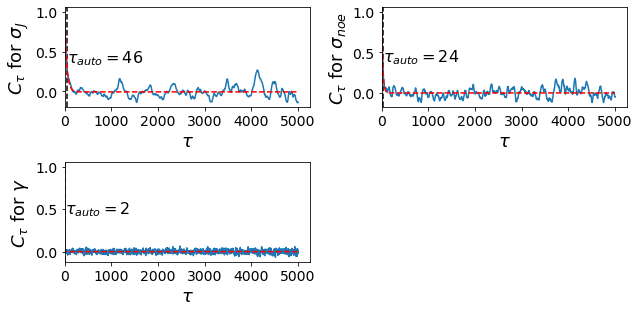

In [4]:
C.get_autocorrelation_curves(method="exp", maxtau=5000)

The functional form can also be changed from single to doubly exponential. The curve fitting method may require prior knowledge about the exponential decay. In this case, the doubly exponential decay does not apply. Below is the code that would be used:

```python
C.exp_function = "double"
C.get_autocorrelation_curves(method="exp", maxtau=5000)
```



For example, a larger value of `maxtau` may be necessary in cases of more slowly decorrelated time series. Occasionally, negative values of $\tau_{auto}$ may be obtained indicating the amount of data is not enough for computing autocorrelation time. Since convergence check of BICePs could be complicated, we offered multiple methods aiming for cross-validation for users to determine if the sampling achieves convergence. 



<h1 style="text-align: left;font-size: 18pt;">Autocorrelation function $C_{\tau}$</h1> 

<!--
and $\tau_{auto}$ from autocorrelation function for processing (output block averaging and JSD distributions)
-->


\begin{equation}
C\left(\theta_{t}, \theta_{t+\tau}\right) \equiv \frac{\overline{\left(\theta_{t}-\overline{\theta}\right)\left(\theta_{t+\tau}-\overline{\theta}\right)}}{s(\theta)^{2}} \Rightarrow c_{\tau}
\label{eq:g} \tag{1}
\end{equation}

where $s(\theta)^{2}$ is the variance and $c_{\tau}$ is independent of the lagtime $\tau$. To find the proper number of lagtime ($\tau_{auto}$), we take integral of $C_{\tau}$ over all lagtimes


\begin{equation}
\tau_{auto} = \int C_{\tau} d \tau
\label{eq:tau} \tag{2}
\end{equation}




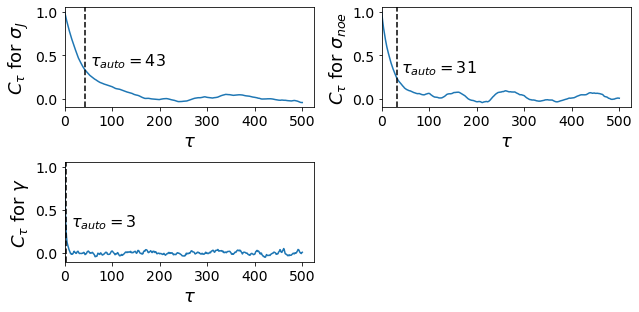

In [5]:
C.get_autocorrelation_curves(method="auto", maxtau=500)

<h1 style="text-align: left;font-size: 18pt;">Block-averaging</h1> 

This approach works by partitioning a window of length `maxtau` into 4 blocks of equal size, then averaging the autocorrelation time for each block. Form these blocks, we can pull out the uncertainty of $\tau_{auto}$.

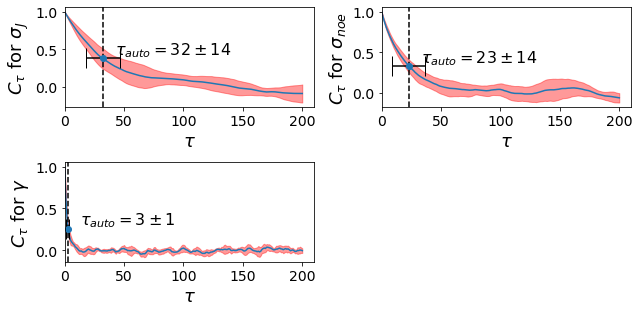

In [6]:
C.get_autocorrelation_curves(method="block-avg", maxtau=200, nblocks=5)

Please note that significant changes in the autocorrelation curve at large $\tau$ may indicate more sampling is required and the system has not reached equilibrium. Occasionally, a negative value of $\tau_{auto}$ may arise, which is an indication that `maxtau` is too small i.e., the amount of data is not enough for computing autocorrelation time. On the other hand, a slowly decorrelated time series with lots of data may also require a larger `maxtau`.



The JSD analysis uses the stored autocorrelation times inside the convergence object `C`.

<h1 style="text-align: left;font-size: 18pt;">Using $\tau_{auto}$ <a href="#Block-averaging">from block averaged autocorrelations</a> for processing (JSD distributions)</h1>


After the autocorrelation times have been stored, `C.process` is called to perform a series of operations including the output of plots from the resulting JSD analysis.  By default, the latter method includes numerous preset arguments: `nround=100` is the number of rounds of bootstrapping when computing JSDs, `nfold=10` is the number of partitions in the shuffled (subsampled) trajectory, and `block_avg=False` specifies whether block averaging is to be used. When `block_avg=True`, the decorrelated time-series data gets partitioned into $n$ blocks (`nblock=5`) and an average is taken over the values of greatest frequency for each block.

```python
C.process(nblock=5, nfold=10, nround=100, savefile=False, block_avg=True, normalize=True)
```

Jensen-Shannon divergence (JSD) is an improved method from Kullback-Leibler divergence and is a statistical way to measure the similarity between two probability distributions. In our convergence test, we are aiming to check if we use more data, will the distribution be different or similar to the less data which is a perfect situation that JSD calculation could be helpful. Given two sets data from BICePs sampling $P_1$ and $P_2$, to check if these two distribution is similar or not, we can compute the JSD as:

\begin{equation}
JSD = H(P_{comb}) - {\pi_1}{H(P_1)} - {\pi_2}{H(P_2)}
\label{eq:JSD_def}\tag{3}
\end{equation}

where $P_{comb}$ is the combined data ($P_{1} \cup P_{2}$). $H$ is the Shannon entropy of distribution $P_i$ and $\pi_i$ is the weight for the probability distribution $P_i$.
Specifically, in BICePs the $P_i$ is the distribution of sampled parameters and ${H(P_i)}$ can be computed as:

\begin{equation}
{H(P_i)} = \sum -\frac{r_i}{N_i}*\ln{\frac{r_i}{N_i}}
\tag{4}
\end{equation}

where $r_i$ and $N_i$ represents sampled times of a specific parameter index and the total number of samples of the parameter, respectively. $\pi_i$ can be computed as $\frac{N_i}{N_{total}}$ where $N_{total} = \sum{N_i}$. Combined together we have:

\begin{equation}
JSD = \sum{(-\frac{r_{total}}{N_{total}}*\ln{\frac{r_{total}}{N_{total}}})} - \frac{N_i}{N_{total}}*\sum(-\frac{r_i}{N_i}*\ln{\frac{r_i}{N_i}})
\label{eq:JSD}\tag{5}
\end{equation}

where $i = 1, 2$ in this example.
In `biceps`, we can import different amount of data into our JSD calculation. To do that, we may use $p\%$ ($p = 10,20,...100$) data and divide the dataset ($P_{total}$) into two parts (the first half and second half) to get $P_1$ and $P_2$ in eq \ref{eq:JSD_def} and compute the JSD value ($JSD_{single}$) using eq \ref{eq:JSD}. Then we can randomly pick up $N_{total}/2$ points from $P_{total}$ as $P_1$ ($N_{total}$ is the total number of data after chopped) and the remaining data as $P_2$. In this way, we are mixing the data and the computed JSD ($JSD_{random}$) from this mixing data should be smaller than the computed JSD from just first versus second half data. But if the dataset is completely converged, $JSD_{single}$ and $JSD_{random}$ should be close. Repeat mixing data $N$ times, we shall get $\Big\{JSD_{random}\Big\}_N$ values and a corresponded distribution. Our null hypothesis is the computed $JSD_{single}$ is not in the distribution of $\Big\{JSD_{random}\Big\}_N$. To test if we can accept or reject the hypothesis, we rank the $JSD_{single}$ values in $\Big\{JSD_{random}\Big\}_N$ in ascending order. If it is in the top 99\% ranked, then we reject the hypothesis which indicates $P_1$ and $P_2$ no matter mixing the data or not are drawn from a mutual distribution and the data is converged. If the ranked $JSD_{single}$ is in the last 1\%, the data is not converged yet.



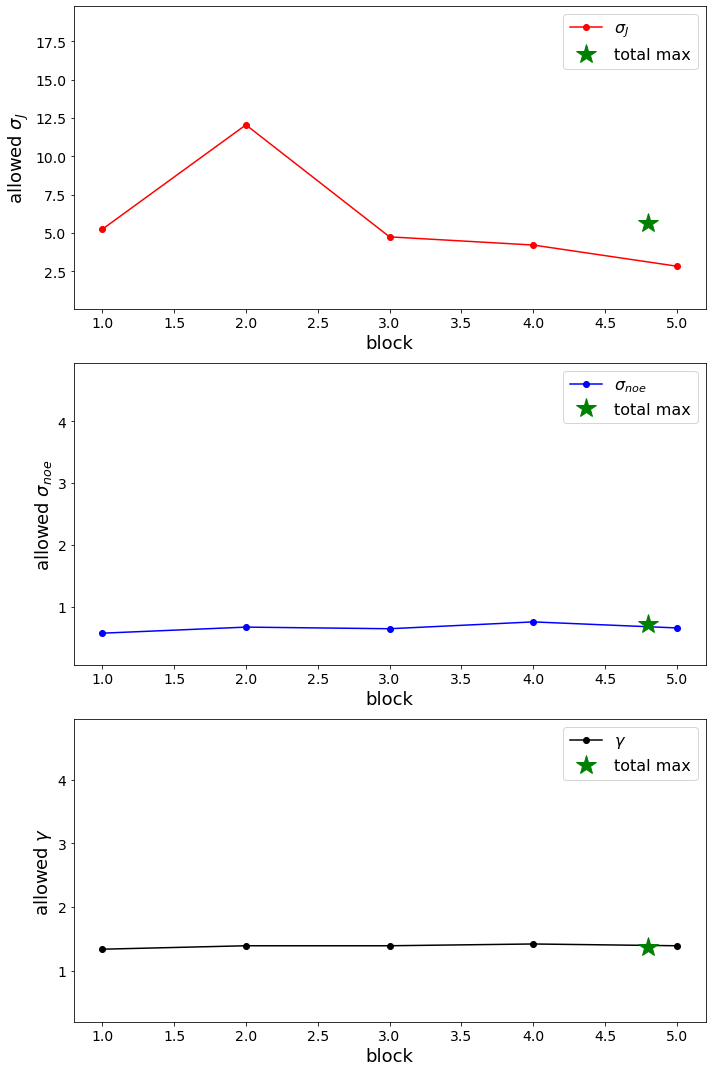

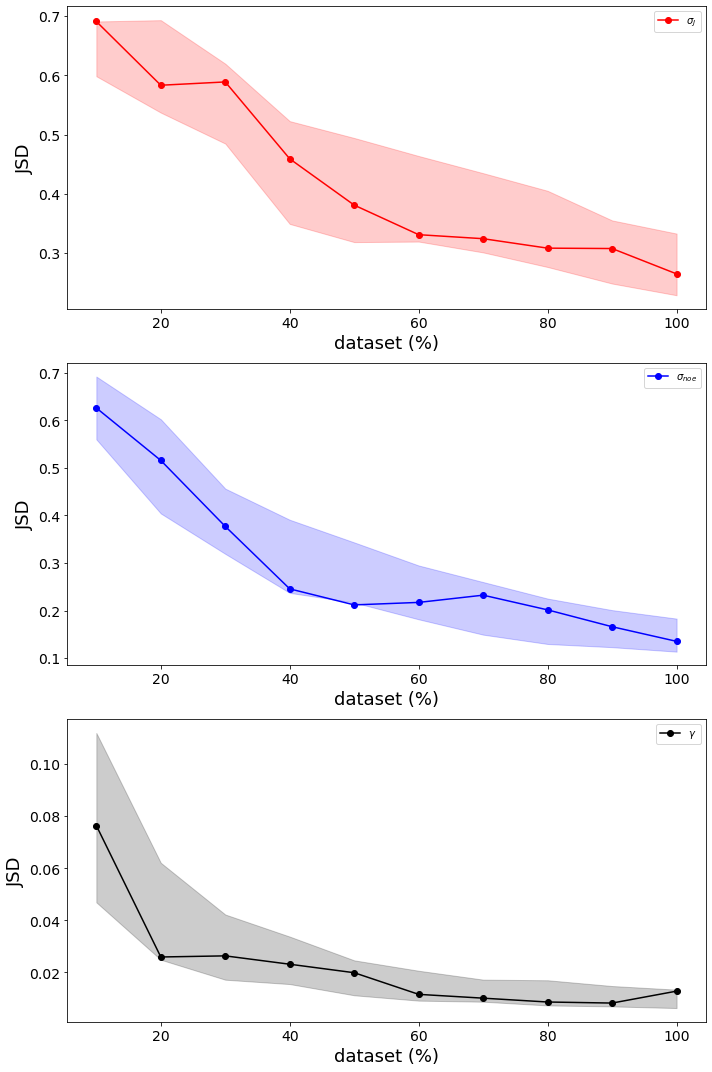

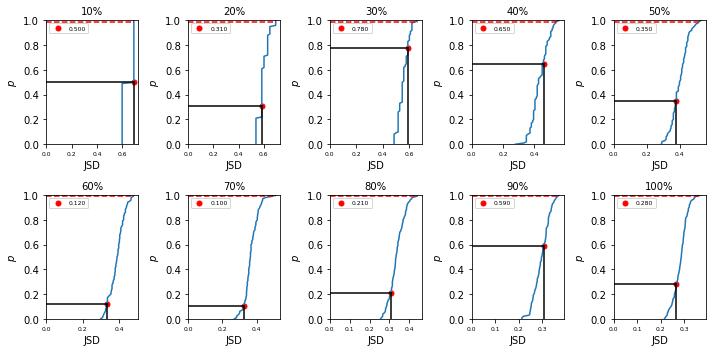

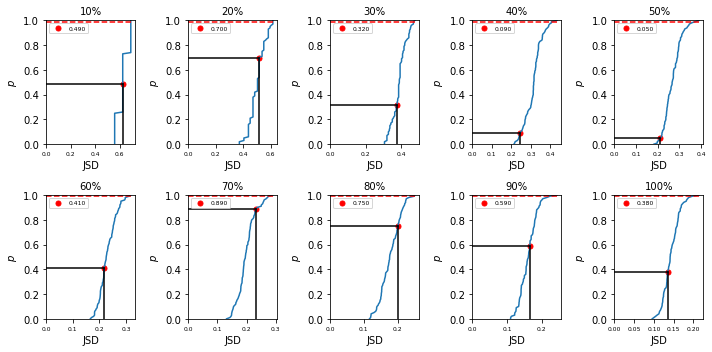

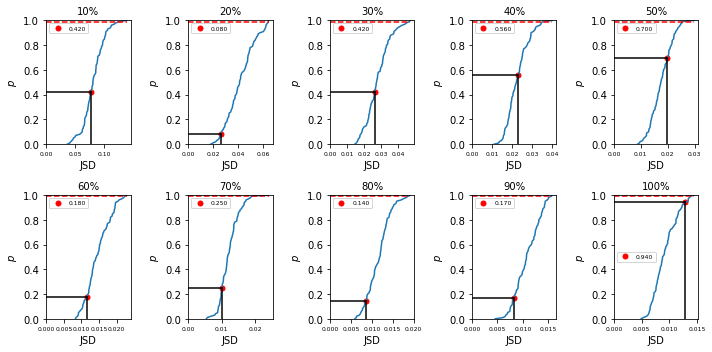

In [7]:
C.process(nblock=5, nfold=10, nround=100, savefile=False, block_avg=True, normalize=True)



In summary of the `biceps.convergence` class is extremely convenient and useful for objectively quantifying sampling quality. Despite there not being a one-size-fits-all approach to checking the validity of MCMC trajectories, we included an assortment of methods to check convergence. Users only need to specify the relative path and trajectory name. If desired, a `method` for computing the autocorrleation time can be specified. The convergence module is extremely convenient and useful for determining sufficient sampling so we can put more trust our simulations. 



References

<li style="list-style-type: none;" id="best">(1) Grossfield, Alan, et al. "Best practices for quantification of uncertainty and sampling quality in molecular simulations [Article v1. 0]." Living journal of computational molecular science 1.1 (2018). <a href="#ref:best" class="footnote-back">↩</a></li>



<h6 style="align: justify;font-size: 12pt"># <span style="color:red;">NOTE</span>: The following cell is for pretty notebook rendering</h6>

In [9]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../../../theme.css", "r").read()
    return HTML(styles)
css_styling()